# COGS 108 - California Electricity Analysis

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [X] YES - make available
* [  ] NO - keep private

#Video

[Group YouTube video](https://youtu.be/qgAxccqrJvE)

# Overview

The group investigated whether political party affiliation to Democratic or Republican parties, education level such as attending some high school or college, and unemployment rate have an effect on energy usage. We performed a multicollinearity analysis on our data to observe the relationship between these various factors and their effects on energy usage. Overall, the group found that these variables do not affect energy consumption in an impactful or meaningful way. Some relationships did stick out such that those groups having some highschool, some college and identifying as democrat are more correlated with each other rather than with energy usage.


# Names

- Brenda Fuentes A15634769
- Britney Vi A16586104
- Dhaval Jani A17173528
- Persephonie Rodriguez A15402313
- Trent Barker A16468643

<a id='research_question'></a>
# Research Question

In this report, we investigated the question: Is there a multiple correlation between  unemployment rate, education (college vs no college), political alignment (democratic vs republican), and an individual's total amount of electric use? 


<a id='background'></a>

## Background & Prior Work

As more people are using electricity every day and the earth is getting polluted at extreme rates. Our team wanted to focus on finding data for something that would help us learn about correlations between certain groups of people and the amount of electricity used. This could help us get one step closer to examining whether or not certain groups use more electricity, and we could potentially use this information in the future to focus our resources for energy saving tactics on groups that use the most electricity if we do happen to find a correlation. 



References (include links):
- Correlation between unemployment rates and electricity and power: http://www.ajbmr.com/articlepdf/aus_20_55i2n2a2.pdf


- Relationship between education and households’ electricity-saving behavior in South Africa:http://www.econrsa.org/publications/working-papers/relationship-between-education-and-households-electricity-saving
- Political affiliation and electricity use:
    https://www.sciencedirect.com/science/article/pii/S2214629617303468
    https://www.power-technology.com/features/politics-and-energy/
    https://www.sciencedaily.com/releases/2018/10/181016142431.htm


As can be seen, the first two studies done only focus on groups of people in certain areas (I.E. South Africa or the United States) and only observe one variable(either being education or unemployment rate) in comparison to electricity usage. We did this differently by focusing only on California and trying to see if multiple variables(political affiliation, education, and unemployment rate) correlate with one single variable (electricity usage). The third point involves links that gave us clues about whether people’s political affiliations can influence their electricity usage. The first link within that bullet point goes into depth of democratic affiliation with renewable energy, the second link gives quick summaries of different politicians and their political standpoint on energy (Which we assume can influence the types of people who agree with that politician), and the third link is an article that argues that both republican and democratic parties agree with certain forms of renewable energy. Overall, all the links provided above gave us a better sense of the types of studies done and their results, which helped us get to a reasonable hypothesis. 



# Hypothesis


We hypothesize that there is a correlation between lower unemployment rate, republican political affiliation, and higher education levels causing high electricity usage. 

We think this will be the outcome because people who are unemployed may not have the money or time to use electricity as much as those with jobs since they may not be able to afford things such as electronics and they may want to keep their electricity bills low overall. 

We hypothesize that republicans will be more likely to use a lot more energy than democrats because based upon some of the research we did (See links above) democrats tend to be more “environmentally conscious” and more college educated which may cause them to be more aware of their electricity usage and attempt to use less of it for the sake of the environment. 

Lastly, higher education levels may cause higher electricity usage in homes since those with higher education levels tend to make more income and thus have more money to spend on electronics and bigger houses. Those with higher education level may also have jobs that require greater use of technology, especially laptops and cell phones, which may increase their electricity usage. 


# Dataset(s)


- Dataset Name: college_by_county
- Link to the dataset: https://data.ers.usda.gov/reports.aspx?ID=17829
- https://raw.githubusercontent.com/trent8800/first-test-ever/main/Book1.csv
- Number of observations: there are 295 observations within this dataset.

This dataset has the percentage of residents who had graduated college in each California County, measured once per decade for 5 decades. With 58 counties and 5 dates each, totaling 295 observations. one of the counties is actually the state average which will be noted. 


---


- Dataset Name: highschool_by_county
- Link to the dataset: https://data.ers.usda.gov/reports.aspx?ID=17829
- https://raw.githubusercontent.com/trent8800/first-test-ever/main/Book2.csv
- Number of observations: there are 295 observations within this dataset.

This dataset has the percentage of residents who had graduated highschool but not college in each California County, measured once per decade for 5 decades. With 58 counties and 5 dates each, totaling 295 observations. one of the counties is actually the state average which will be noted. 



---



- Dataset Name: electric_by_county
- Link to the dataset:https://ecdms.energy.ca.gov/elecbycounty.aspx
- https://raw.githubusercontent.com/trent8800/first-test-ever/main/ElectricityByCounty%20(1).csv
- Number of observations: 1740 observations, 58 counties, 30 measurements per county

This set has data for all 58 counties, one being the state average. There are measurements for each year from 2020 to 1990 detailing the amount of electricity used in the residential sections of each county of California.



---


- Dataset Name: county_unemployment
- Link to the dataset: https://data.edd.ca.gov/Labor-Force-and-Unemployment-Rates/Local-Area-Unemployment-Statistics-LAUS-Annual-Ave/7jbb-3rb8/data
- https://raw.githubusercontent.com/trent8800/first-test-ever/main/Local_Area_Unemployment_Statistics__LAUS___Annual_Average.csv
- Number of observations: 30 years per each of the 58 counties, so 1740 relevant observaions.

This dataset has unemployment data for all 58 counties in california from 1990 to 2020. We only want the unemployment rate from each row.  



---


- Dataset Name: politics_2012
- Link to the dataset: https://data.world/aaronhoffman/us-general-election-2012/workspace/file?filename=us-election-2012-results-by-county.csv
- https://raw.githubusercontent.com/trent8800/first-test-ever/main/us-election-2012-results-by-county.csv

- Number of observations: Recording of the number of votes for each politcal party for each county. We only care about the number of democratic votes and the total count, so 116 relevant obervations

This dataset gives the total number of votes for each political party organized by each county in California. We will use this to find the percentage of the votes that were democratic.



---


We plan to merge all of our datasets since they are a trend by county over time. They would all make sense merged together, with each added dataset constituting new columns for each merged variable. We could have a single dataframe for every observation, which will be done bby matching each desired observation by the county and year they have in common.

# Setup

In [47]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest
import patsy
import statsmodels.api as sm

# Data Cleaning

For each dataset, we made sure there were no missing variables so we did not have to take that into account or have holes in the data. We went on to simplify each dataset down to the observations relevant to our project. This meant that for datasets that spanned over time, we got the average for each county and reduced the value to the average so that each county only had one observation for each variable. We standardized the county names in each dataframe so that they could be reliably merged using that shared column in each dataframe. Since each of our observed variables were rates, we made them all float values for consistency. Once we had the rate of each variable for each county, we merged them into a single dataframe with a column for each of our observed variables, each observation corresponding to the county whose row it is in. The elctricity amount in the final dataset is found by getting the average for that county, as with the rate data that was over time.

In [48]:
def convert_to_int(string):
  return float(string)

#this function takes a string input and produces it as an integer

In [49]:
def standardize_text(str1):
    
    str1 = str1.lower()
    str1 = str1.strip()
    str1 = str1.replace(', ca', '')
    str1 = str1.replace(' county', '')
    return str1

#This function removes ', county' and ', ca' from text to make the data more uniform
#we create a function to reduce the County names to their most simple forms, getting
# rid of the abbreviation for California attached to each name. This is to prepare the data for merging

In [50]:
def remove_percent(input_string):
  input_string = input_string.replace('%', '')
  output = float(input_string)
  return output
#This function strips the rate values of their percent symbol and converts them to an int data type


In [51]:
def to_lower_case(string):
  return string.lower()

#This function returns the lowercase of the input string

First Dataset = Percent of residents whom have graduated college in each county

In [52]:
college_by_county = pd.read_csv('https://raw.githubusercontent.com/trent8800/first-test-ever/main/Book1.csv')
#read in the dataset which was downloaded, put in a public repo, and sourced form there.

college_by_county.drop(['Textbox12', 'ruc_code', 'fips'], inplace=True, axis=1)
#Eliminate unecessary columns

college_by_county = college_by_county.reset_index()
#prepare the data for transition from wide to long

college_by_county = pd.wide_to_long(df = college_by_county, stubnames = ["rate_"], i = 'index', j = 'year')
#the different observations of each year was in different columns rather than having a column to record which year the row belonged to. 
#This makes the data much more usable since the year can be treated as a more cohesive variable

college_by_county = college_by_county.sort_values(by = 'county')
#this organizes the data by county rather than by year which makes it more readable. 
#It would be preferable to further sort it by year within the sorting by county, but that will come in time

college_by_county.head()

county   rate_
index year                             
1     1970  Alameda, CA          14.60%
      1990  Alameda, CA          28.80%
      2000  Alameda, CA          34.90%
      2010  Alameda, CA          47.40%
      1980  Alameda, CA          22.30%

Second dataset = percent of residents by county who graduated highschool but not college

In [53]:
highschool_by_county = pd.read_csv('https://raw.githubusercontent.com/trent8800/first-test-ever/main/Book2.csv')
#read in the dataset which was downloaded, put in a public repo, and sourced form there.

highschool_by_county.drop(['Textbox12', 'ruc_code', 'fips'], inplace=True, axis=1)
#Eliminate unecessary columns

highschool_by_county = highschool_by_county.reset_index()
#prepare the data for transition from wide to long

highschool_by_county = pd.wide_to_long(df = highschool_by_county, stubnames = ["rate_"], i = 'index', j = 'year', )
#the different observations of each year was in different columns rather than having a column to record which year the row belonged to. 
#This makes the data much more usable since the year can be treated as a more cohesive variable

highschool_by_county = highschool_by_county.sort_values(by = 'county')
#this organizes the data by county rather than by year which makes it more readable. 
#It would be preferable to further sort it by year within the sorting by county, but that will come in time

highschool_by_county.head()

county   rate_
index year                             
1     1970  Alameda, CA          33.50%
      1990  Alameda, CA          22.80%
      2000  Alameda, CA          19.00%
      2010  Alameda, CA          17.60%
      1980  Alameda, CA          31.70%

In [54]:
college_by_county['county'] = college_by_county['county'].astype('string')
highschool_by_county['county'] = highschool_by_county['county'].astype('string')
college_by_county.dtypes
#here, we convert the names of the counties to string to make it more uniform

county    string
rate_     object
dtype: object

In [55]:
college_by_county['county'] = college_by_county['county'].apply(standardize_text)
highschool_by_county['county'] = highschool_by_county['county'].apply(standardize_text)
college_by_county['county'].unique()
#Here, we standardize the text of the counties, and list them all, noticing that 'california'
#is listed. It was an average of all the counties, but the other data does not have it, so we will get rid of it. 

array(['alameda', 'alpine', 'amador', 'butte', 'calaveras', 'california',
       'colusa', 'contra costa', 'del norte', 'el dorado', 'fresno',
       'glenn', 'humboldt', 'imperial', 'inyo', 'kern', 'kings', 'lake',
       'lassen', 'los angeles', 'madera', 'marin', 'mariposa',
       'mendocino', 'merced', 'modoc', 'mono', 'monterey', 'napa',
       'nevada', 'orange', 'placer', 'plumas', 'riverside', 'sacramento',
       'san benito', 'san bernardino', 'san diego', 'san francisco',
       'san joaquin', 'san luis obispo', 'san mateo', 'santa barbara',
       'santa clara', 'santa cruz', 'shasta', 'sierra', 'siskiyou',
       'solano', 'sonoma', 'stanislaus', 'sutter', 'tehama', 'trinity',
       'tulare', 'tuolumne', 'ventura', 'yolo', 'yuba'], dtype=object)

In [56]:
college_by_county = college_by_county[college_by_county.county != 'california']
highschool_by_county = highschool_by_county[highschool_by_county.county != 'california']
college_by_county['county'].unique()
#here, we get rid of the california row and check both dataframes to make sure it is gone.

array(['alameda', 'alpine', 'amador', 'butte', 'calaveras', 'colusa',
       'contra costa', 'del norte', 'el dorado', 'fresno', 'glenn',
       'humboldt', 'imperial', 'inyo', 'kern', 'kings', 'lake', 'lassen',
       'los angeles', 'madera', 'marin', 'mariposa', 'mendocino',
       'merced', 'modoc', 'mono', 'monterey', 'napa', 'nevada', 'orange',
       'placer', 'plumas', 'riverside', 'sacramento', 'san benito',
       'san bernardino', 'san diego', 'san francisco', 'san joaquin',
       'san luis obispo', 'san mateo', 'santa barbara', 'santa clara',
       'santa cruz', 'shasta', 'sierra', 'siskiyou', 'solano', 'sonoma',
       'stanislaus', 'sutter', 'tehama', 'trinity', 'tulare', 'tuolumne',
       'ventura', 'yolo', 'yuba'], dtype=object)

In [57]:
highschool_by_county['county'].unique()
#Looking at the list of unique names, we see that the average for the state is 
#included under a county names 'california'. we can get rid of this. 

array(['alameda', 'alpine', 'amador', 'butte', 'calaveras', 'colusa',
       'contra costa', 'del norte', 'el dorado', 'fresno', 'glenn',
       'humboldt', 'imperial', 'inyo', 'kern', 'kings', 'lake', 'lassen',
       'los angeles', 'madera', 'marin', 'mariposa', 'mendocino',
       'merced', 'modoc', 'mono', 'monterey', 'napa', 'nevada', 'orange',
       'placer', 'plumas', 'riverside', 'sacramento', 'san benito',
       'san bernardino', 'san diego', 'san francisco', 'san joaquin',
       'san luis obispo', 'san mateo', 'santa barbara', 'santa clara',
       'santa cruz', 'shasta', 'sierra', 'siskiyou', 'solano', 'sonoma',
       'stanislaus', 'sutter', 'tehama', 'trinity', 'tulare', 'tuolumne',
       'ventura', 'yolo', 'yuba'], dtype=object)

In [58]:
college_by_county['rate_'] = college_by_county['rate_'].apply(remove_percent)
highschool_by_county['rate_'] = highschool_by_county['rate_'].apply(remove_percent)
#We apply the function to both datasets and present that it worked. 
college_by_county.head()

county  rate_
index year                
1     1970  alameda   14.6
      1990  alameda   28.8
      2000  alameda   34.9
      2010  alameda   47.4
      1980  alameda   22.3

In [59]:


average_college = college_by_county.groupby('county').mean().reset_index()
#Find the average college graduation rate in the county from 1990-2020
average_college['rate_'] = average_college['rate_'].apply(convert_to_int)
average_college = average_college.rename({'rate_': 'college_rate'}, axis=1)
#Rename column '_rate' to 'college_rate' 
average_college

,county,college_rate
0,alameda,29.60
1,alpine,24.42
2,amador,14.18
3,butte,19.28
4,calaveras,14.22
5,colusa,11.80
6,contra costa,30.34
7,del norte,10.64
8,el dorado,21.88
9,fresno,16.20


Third dataset = Electricity used in residential areas by county

In [60]:
electric_by_county = pd.read_csv('https://raw.githubusercontent.com/trent8800/first-test-ever/main/ElectricityByCounty%20(1).csv')
#This data was downloaded, moved into one of our public repos, and sourced from there. 

electric_by_county.head()
#Using head, we see that there are far more years in this dataset than the previous two, so we will wait to convert this to long format until we decide whether we only want to 
#include the years included in the prior data or if we should just include every year and have empty data

,County,Sector,2020,2019,2018,2017,2016,2015,2014,2013,...,1998,1997,1996,1995,1994,1993,1992,1991,1990,Total Usage
0,ALAMEDA,Residential,3308.467553,3015.393947,2948.368675,2995.051965,2920.921179,2897.493974,2894.253363,2986.226437,...,2791.331173,2674.834394,2615.308775,2548.457958,2774.566317,2529.229286,2465.000074,2515.209970,2498.265626,88761.931680
1,ALPINE,Residential,10.244564,10.303433,9.593224,10.053618,9.343622,11.904472,12.024085,13.469417,...,6.792005,6.373298,6.063832,6.231561,6.183168,6.812776,5.808735,6.165242,6.036978,265.051990
2,AMADOR,Residential,151.826812,138.743791,137.221822,143.779929,135.749855,132.933242,134.842253,139.540785,...,123.223191,114.815322,115.017917,110.744724,110.372675,109.035503,105.907059,108.875556,105.093388,4010.134780
3,BUTTE,Residential,736.395940,662.643253,721.603925,764.450593,725.366331,716.200612,721.202572,731.120746,...,616.781540,597.449897,594.667475,559.101202,556.276390,551.043168,555.149304,553.073852,547.901570,20588.531456
4,CALAVERAS,Residential,222.260763,202.624931,202.478568,214.931215,198.531876,191.566207,192.873215,199.986790,...,167.369797,157.714415,153.829455,148.585115,146.123388,145.291775,140.066797,143.201069,138.299372,5607.159011


In [61]:
electric_by_county.shape
#We are able to see that there is data listed for 58 counties, just as in the previous datasets, which will make that mapping go smoothly. 
#We also checked each dataset for null values and found none

(58, 34)

In [62]:
electric_by_county = electric_by_county.rename({'County': 'county'}, axis=1)
electric_by_county['county'] = electric_by_county['county'].astype('string')
electric_by_county
#here, we simplified the column name 'county', and made all of the counties

,county,Sector,2020,2019,2018,2017,2016,2015,2014,2013,...,1998,1997,1996,1995,1994,1993,1992,1991,1990,Total Usage
0,ALAMEDA,Residential,3308.467553,3015.393947,2948.368675,2995.051965,2920.921179,2897.493974,2894.253363,2986.226437,...,2791.331173,2674.834394,2615.308775,2548.457958,2774.566317,2529.229286,2465.000074,2515.209970,2498.265626,88761.931680
1,ALPINE,Residential,10.244564,10.303433,9.593224,10.053618,9.343622,11.904472,12.024085,13.469417,...,6.792005,6.373298,6.063832,6.231561,6.183168,6.812776,5.808735,6.165242,6.036978,265.051990
2,AMADOR,Residential,151.826812,138.743791,137.221822,143.779929,135.749855,132.933242,134.842253,139.540785,...,123.223191,114.815322,115.017917,110.744724,110.372675,109.035503,105.907059,108.875556,105.093388,4010.134780
3,BUTTE,Residential,736.395940,662.643253,721.603925,764.450593,725.366331,716.200612,721.202572,731.120746,...,616.781540,597.449897,594.667475,559.101202,556.276390,551.043168,555.149304,553.073852,547.901570,20588.531456
4,CALAVERAS,Residential,222.260763,202.624931,202.478568,214.931215,198.531876,191.566207,192.873215,199.986790,...,167.369797,157.714415,153.829455,148.585115,146.123388,145.291775,140.066797,143.201069,138.299372,5607.159011
5,COLUSA,Residential,73.250484,66.850386,65.425177,68.393820,64.793233,64.340477,64.860402,64.840356,...,54.668412,54.037338,53.461666,50.557113,50.078667,49.733609,50.535778,50.731018,50.598114,1850.799830
6,CONTRA COSTA,Residential,3214.267766,2887.272092,2806.147783,2891.294898,2758.572817,2737.737407,2737.561124,2769.601161,...,2447.728051,2341.159662,2316.045847,2177.154476,2137.669934,2167.951542,2094.083360,2073.815256,2074.798616,79785.565196
7,DEL NORTE,Residential,118.510243,117.161857,114.235067,122.785745,112.343710,116.134032,110.111431,126.534214,...,110.065812,107.696817,139.830574,106.566610,110.776041,116.229421,106.383258,104.812778,90.982237,3679.570540
8,EL DORADO,Residential,820.014926,760.773350,748.631682,778.860125,753.118702,723.806295,723.359561,757.876016,...,634.835862,591.638586,576.954082,558.651068,548.553618,550.149822,529.892679,539.328355,524.585004,21228.366556
9,FRESNO,Residential,3101.806814,2768.954406,2745.048779,2795.953273,2663.517316,2675.128646,2706.156603,2695.074728,...,2053.582810,2033.819526,2015.179260,1895.082375,1874.339769,1832.378756,1865.168616,1840.839026,1785.877540,73037.127932


In [63]:
#Remove superfluos parts of county label and convert to lower case
electric_by_county['county'] = electric_by_county['county'].apply(standardize_text)
#removing columns we don't need/won't use
electric_by_county = electric_by_county.drop(labels=['Sector', 'Total Usage'], axis=1)
electric_by_county.head()
#Here, we standardized the county names and dropped unecessary columns

,county,2020,2019,2018,2017,2016,2015,2014,2013,2012,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
0,alameda,3308.467553,3015.393947,2948.368675,2995.051965,2920.921179,2897.493974,2894.253363,2986.226437,2999.683662,...,2890.767335,2791.331173,2674.834394,2615.308775,2548.457958,2774.566317,2529.229286,2465.000074,2515.209970,2498.265626
1,alpine,10.244564,10.303433,9.593224,10.053618,9.343622,11.904472,12.024085,13.469417,9.336312,...,6.597345,6.792005,6.373298,6.063832,6.231561,6.183168,6.812776,5.808735,6.165242,6.036978
2,amador,151.826812,138.743791,137.221822,143.779929,135.749855,132.933242,134.842253,139.540785,141.108452,...,124.602037,123.223191,114.815322,115.017917,110.744724,110.372675,109.035503,105.907059,108.875556,105.093388
3,butte,736.395940,662.643253,721.603925,764.450593,725.366331,716.200612,721.202572,731.120746,739.696040,...,629.147565,616.781540,597.449897,594.667475,559.101202,556.276390,551.043168,555.149304,553.073852,547.901570
4,calaveras,222.260763,202.624931,202.478568,214.931215,198.531876,191.566207,192.873215,199.986790,201.712325,...,170.901166,167.369797,157.714415,153.829455,148.585115,146.123388,145.291775,140.066797,143.201069,138.299372


In [64]:
electric_by_county = electric_by_county.melt(id_vars=['county'], var_name='year', value_name='electricity')
electric_by_county = electric_by_county.sort_values(by = ['county', 'year'])
electric_by_county = electric_by_county.reset_index()
electric_by_county = electric_by_county.drop(labels=['index'], axis=1)


electric_by_county.iloc[:20]

,county,year,electricity
0,alameda,1990,2498.265626
1,alameda,1991,2515.209970
2,alameda,1992,2465.000074
3,alameda,1993,2529.229286
4,alameda,1994,2774.566317
5,alameda,1995,2548.457958
6,alameda,1996,2615.308775
7,alameda,1997,2674.834394
8,alameda,1998,2791.331173
9,alameda,1999,2890.767335


In [65]:
average_electric_by_county = electric_by_county.groupby('county').mean().reset_index()
#Find the average electricity usage by county over the years 1190 - 2020
average_electric_by_county['county'] = average_electric_by_county['county'].astype('string')

average_electric_by_county


,county,electricity
0,alameda,2863.288119
1,alpine,8.550064
2,amador,129.359186
3,butte,664.146176
4,calaveras,180.876097
5,colusa,59.703220
6,contra costa,2573.727910
7,del norte,118.695824
8,el dorado,684.786018
9,fresno,2356.036385


In [66]:
average_highschool = highschool_by_county.groupby('county').mean().reset_index()
#Find the average highschool graduation rate by county from the years 1990-2020
average_highschool['rate_'] = average_highschool['rate_'].apply(convert_to_int)
#Convert the 'rate_' column to int
average_highschool = average_highschool.rename({'rate_': 'highschool_rate'}, axis=1)
#Rename the column 'rate_' to 'highschool_rate'

average_highschool

,county,highschool_rate
0,alameda,24.92
1,alpine,29.80
2,amador,33.96
3,butte,27.14
4,calaveras,32.26
5,colusa,28.02
6,contra costa,25.18
7,del norte,32.20
8,el dorado,29.28
9,fresno,24.40


Fourth Dataset - Unemployment rate in each California county

In [67]:
county_unemployment = pd.read_csv('https://raw.githubusercontent.com/trent8800/first-test-ever/main/Local_Area_Unemployment_Statistics__LAUS___Annual_Average.csv')
#Load in unemployment data from 1990 - 2020
county_unemployment.head()

,Area Type,Area Name,Year,Period,Labor Force,Employment,Unemployment,Unemployment Rate,Seasonally Adjusted (Y N),Status
0,County,Alameda County,2009,Annual,764600,682800,81800,10.7,N,Final
1,County,Alameda County,2008,Annual,756800,709600,47200,6.2,N,Final
2,County,Alameda County,2007,Annual,746200,711500,34700,4.7,N,Final
3,County,Alameda County,2006,Annual,735000,702400,32600,4.4,N,Final
4,County,Alameda County,2018,Annual,841500,815700,25800,3.1,N,Final


In [68]:
county_unemployment = county_unemployment.rename({'Area Name': 'county', 'Year': 'year', 'Unemployment Rate':'unemployment_rate' }, axis=1)
#Renaming columns for consistency 
county_unemployment = county_unemployment.drop(labels=['Area Type', 'Period', 'Period', 
                                                       'Labor Force', 'Employment', 'Unemployment', 
                                                       'Seasonally Adjusted (Y N)', 'Status'], axis=1)
county_unemployment['county'] = county_unemployment['county'].apply(standardize_text)
#standardize text 
county_unemployment = county_unemployment.sort_values(by = ['county', 'year'])
#sort by county and year
county_unemployment = county_unemployment.reset_index()
county_unemployment = county_unemployment.drop(labels=['index'], axis=1)


county_unemployment.iloc[:10][:]


,county,year,unemployment_rate
0,alameda,1990,4.0
1,alameda,1991,5.5
2,alameda,1992,6.6
3,alameda,1993,6.7
4,alameda,1994,6.2
5,alameda,1995,5.7
6,alameda,1996,5.1
7,alameda,1997,4.5
8,alameda,1998,4.1
9,alameda,1999,3.5


In [69]:
average_unemployment = county_unemployment.groupby('county').mean().reset_index()
#Find mean unemployment rate per county from 1990-2020
average_unemployment = average_unemployment.drop(labels=['year'], axis=1)
#Remove the year column because we're looking at mean
average_unemployment

,county,unemployment_rate
0,alameda,5.877419
1,alpine,9.477419
2,amador,7.370968
3,butte,8.722581
4,calaveras,8.474194
5,colusa,16.554839
6,contra costa,5.780645
7,del norte,9.932258
8,el dorado,6.525806
9,fresno,12.090323


Fifth Dataset - Votes per party in every county of every state. We will create a dataframe of only the California counties using this.

In [70]:
politics_2012= pd.read_csv('https://raw.githubusercontent.com/trent8800/first-test-ever/main/us-election-2012-results-by-county.csv')
politics_2012.head()

,County2012Id,StateCode,CountyName,CountyNumber,FipsCode,PrecintsReporting,TotalPrecincts,CountyTotalVotes,SourceOrder,Party,FirstName,LastName,Votes
0,2,AK,Alaska,2001,2000,437,438,220596,1,Dem,Barack,Obama,91696
1,4,AL,Autauga,1001,1001,28,28,23909,1,Dem,Barack,Obama,6354
2,5,AL,Baldwin,1002,1003,55,55,84988,1,Dem,Barack,Obama,18329
3,6,AL,Barbour,1003,1005,19,19,11459,1,Dem,Barack,Obama,5873
4,7,AL,Bibb,1004,1007,10,10,8391,1,Dem,Barack,Obama,2200


In [71]:
CA_politics = politics_2012[politics_2012['StateCode'] == 'CA']

#We see there are 58 different counties
CA_politics['Party'].value_counts()

#obama = CA_politics[CA_politics['LastName'] == 'Obama']
#print(sum(obama['Votes']))
#romney = CA_politics[CA_politics['LastName'] == 'Romney']
#print(sum(romney['Votes']))


Dem    58
GOP    58
PFP    58
AIP    58
Lib    58
Grn    58
Name: Party, dtype: int64

In [72]:
CA_politics_dem = CA_politics.copy()
#Here, we create a dataframe intended to only hold the percentage of the votes that were democratic.
#We leave the initial dataframe intact for potential later use
CA_politics_dem.drop(['StateCode', 'County2012Id', 'CountyNumber', 'FipsCode', 'PrecintsReporting', 'TotalPrecincts', 'SourceOrder', 'FirstName', 'LastName'], axis=1, inplace=True)
#We drop unnecessary columns
indexes = CA_politics_dem[CA_politics_dem['Party'] != 'Dem'].index
#We get rid of any vote result that is not Democratic
CA_politics_dem.drop(indexes, inplace=True)

CA_politics_dem['dem_rate'] = (CA_politics_dem['Votes']/CA_politics_dem['CountyTotalVotes'])*100
#We create a column that represents the percentage of the total votes that were Democratic
CA_politics_dem.reset_index(inplace=True)
CA_politics_dem

,index,CountyName,CountyTotalVotes,Party,Votes,dem_rate
0,158,Alameda,558386,Dem,438091,78.456659
1,159,Alpine,647,Dem,389,60.123648
2,160,Amador,15303,Dem,6001,39.214533
3,161,Butte,70163,Dem,32567,46.416202
4,162,Calaveras,18469,Dem,7404,40.088797
5,163,Colusa,5865,Dem,2248,38.329071
6,164,Contra Costa,351257,Dem,230826,65.714278
7,165,Del Norte,7940,Dem,3396,42.770781
8,166,El Dorado,85923,Dem,34033,39.608719
9,167,Fresno,180244,Dem,85862,47.636537


In [73]:
CA_politics_dem.drop(['index', 'CountyTotalVotes', 'Party', 'Votes'], axis=1, inplace=True)
#We simplify the dataframe, getting rid of extra columns and getting it ready to merge
CA_politics_dem

,CountyName,dem_rate
0,Alameda,78.456659
1,Alpine,60.123648
2,Amador,39.214533
3,Butte,46.416202
4,Calaveras,40.088797
5,Colusa,38.329071
6,Contra Costa,65.714278
7,Del Norte,42.770781
8,El Dorado,39.608719
9,Fresno,47.636537


In [74]:
CA_politics_dem['CountyName'] = CA_politics_dem['CountyName'].apply(standardize_text)
CA_politics_dem
#We standardize the county names to make the merging go well

,CountyName,dem_rate
0,alameda,78.456659
1,alpine,60.123648
2,amador,39.214533
3,butte,46.416202
4,calaveras,40.088797
5,colusa,38.329071
6,contra costa,65.714278
7,del norte,42.770781
8,el dorado,39.608719
9,fresno,47.636537


In [75]:
#Removing the columns we don't directly need for this
#Doing some extra work on the extra dataframe for later potential use
CA_politics.drop(['StateCode', 'County2012Id', 'CountyNumber', 'FipsCode', 'PrecintsReporting', 'TotalPrecincts', 'CountyTotalVotes', 'SourceOrder', 'FirstName', 'LastName'], axis=1, inplace=True)


In [76]:

CA_politics['CountyName'] = CA_politics['CountyName'].apply(to_lower_case)
CA_politics
#We put the names of the counties into lowercase to make it more consistent with our other data

,CountyName,Party,Votes
158,alameda,Dem,438091
159,alpine,Dem,389
160,amador,Dem,6001
161,butte,Dem,32567
162,calaveras,Dem,7404
...,...,...,...
19819,tulare,Grn,293
19820,tuolumne,Grn,133
19821,ventura,Grn,1255
19822,yolo,Grn,569


In [77]:
CA_politics.reset_index()
CA_politics
indexes = CA_politics.groupby(['CountyName'])['Votes'].transform(max) == CA_politics['Votes']
new_df = CA_politics[indexes]
new_df
#Here we find the party that had the most votes to find out what the majority was in each county
#This is to compare the means of the amount of electricity used in counties who voted democratic vs republican,
#just as extra analysis

,CountyName,Party,Votes
158,alameda,Dem,438091
159,alpine,Dem,389
164,contra costa,Dem,230826
169,humboldt,Dem,27757
170,imperial,Dem,17464
174,lake,Dem,9159
176,los angeles,Dem,1672164
178,marin,Dem,73450
180,mendocino,Dem,11869
181,merced,Dem,26128


In [78]:
democratic_counties = new_df[new_df['Party'] == 'Dem']
conservative_counties = new_df[new_df['Party'] == 'GOP']
#If the 'democratic' column is true, that county is Dem, whereas if it is false, it will be GOP
average_electric_by_county['democratic'] = average_electric_by_county['county'].isin(democratic_counties['CountyName'])
#Gives us averages for democratic and republican county electricity averages
average_electric_by_county.groupby('democratic')['electricity'].mean()

democratic
False     815.632793
True     2042.422046
Name: electricity, dtype: float64

An interesting result that blue counties generally use more than twice as much electricity than red ones, somewhat unexpected, however we must also consider that this is **not enough** to make the claim that Democrats use more electricity, as each county can not solely be written off as Dem or GOP with the large populations and close swing counties. 

In [79]:
avgDem =average_electric_by_county.groupby('democratic')['electricity'].mean().iloc[1:2]
avgRep =average_electric_by_county.groupby('democratic')['electricity'].mean().iloc[0:1]

propEnergy = float(avgDem) / float(avgRep)
propEnergy

2.5040950570494687

The above value is showing the average electricity usage by democrats divided by the average energy usage of republicans. It expands on the previous cell where we found the average usage of electricity by party.

Here we can see that it appears that democrats use 2.5 times more electricity; however our dataset is too limited for this observation to be seen as conclusive. While this observation isn't necessary to observe collinearity; we found it fascinating to see such a difference of energy usage between the political parties.

In [80]:
average_electric_by_county = average_electric_by_county.drop(['democratic'], axis=1)

In [81]:
average_college['county'] = average_college['county'].astype('string')
#We make sure all of the county columns are data type string
merged = pd.concat([average_college, average_highschool, average_electric_by_county, 
                    average_unemployment, CA_politics_dem], axis=1).sort_index()
#We create a merged dataframe of all relevant data based on their counties so it lines up
merged.drop(['county'], inplace=True, axis=1)   
merged = merged[['CountyName', 'electricity', 'college_rate', 'highschool_rate', 'unemployment_rate', 'dem_rate']] 
#We drop the extra county columns  and reorder the columns   
merged.rename(columns={'CountyName':'county_name'}, inplace=True)      
#We rename the county column to be more consistent with the other names       
#Combine all of the data onto one table
merged.head()

,county_name,electricity,college_rate,highschool_rate,unemployment_rate,dem_rate
0,alameda,2863.288119,29.60,24.92,5.877419,78.456659
1,alpine,8.550064,24.42,29.80,9.477419,60.123648
2,amador,129.359186,14.18,33.96,7.370968,39.214533
3,butte,664.146176,19.28,27.14,8.722581,46.416202
4,calaveras,180.876097,14.22,32.26,8.474194,40.088797


Overall, the data was very clean and had no missing values. The only thing it needed was some restructuring, and some merging very soon. Since the dataframe was small enough, looking at the entire thing using iloc allowed us to thoroughly examine the columns and determine which were not needed.

# Data Analysis & Results

The following section contains various visual aids to understand our data. The ordering is a bit particular as we wanted people to be able to visually compare the trends in our data, the relationships between our data sets, and energy usage. 

The first two graphs show the average percentage of people who attended college in that county over five decades. The first was sorted by alphabetical order to make it easier to compare to our other data sets that were also sorted alphabetically, and the second image was sorted from the lowest to highest frequency to possibly understand any trends.

The next two graphs show the number of democratic voters per county sorted in the same order as the college data for easy comparison. 

The fifth graph shows the margin of winning votes in each county. The democratic party was represented in blue and the republican party was in red. It was sorted by the democratic counties in alphabetical order and then republican in alphabetical order. This made it easier to compare to our fourth graph that sorted counties from the highest to lowest electricity usage. 

Our final graph combines all of our factors (highschool education, college education, democratic affiliation, and unemployment rate) with electricity usage.

Using these visuals we were able to notice a trend of major cities(like San Fransisco and Los Angeles) having a more educated population, as well as having a stronger affiliation to the democratic party. We wanted these visuals to tie that together as that was something observed in our final results. 


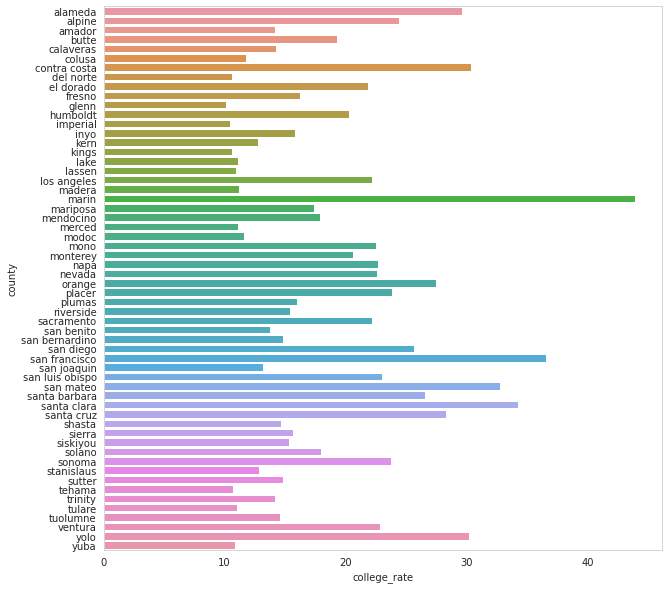

In [82]:
plt.figure(figsize=(10, 10))
sns.barplot(x=average_college['college_rate'], y=average_college['county'])

This graph shows the the percent of people in each county that graduated college organized by county in alphabetical order

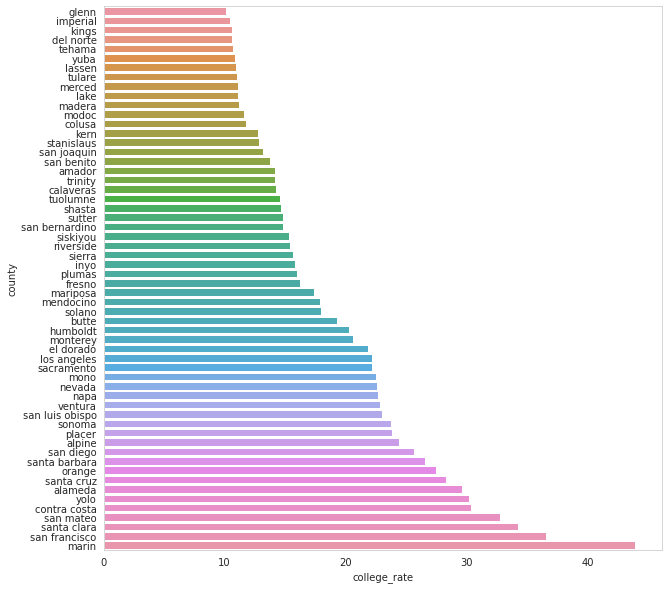

In [83]:
plt.figure(figsize=(10, 10))
sns.barplot(x=average_college['college_rate'], y=average_college['county'], order=average_college.sort_values('college_rate').county)

As shown by the sorted graph, one observation we can see is that the counties of Marin, San Francisco, Santa Clara, and San Mateo all have the highest rates of college education, and are all congregated in the bay area.

The data appears to be normally distributed, with no outliers that would need to be addressed. From this, we can learn that we may be able to assume a normal distribution without much trouble. 

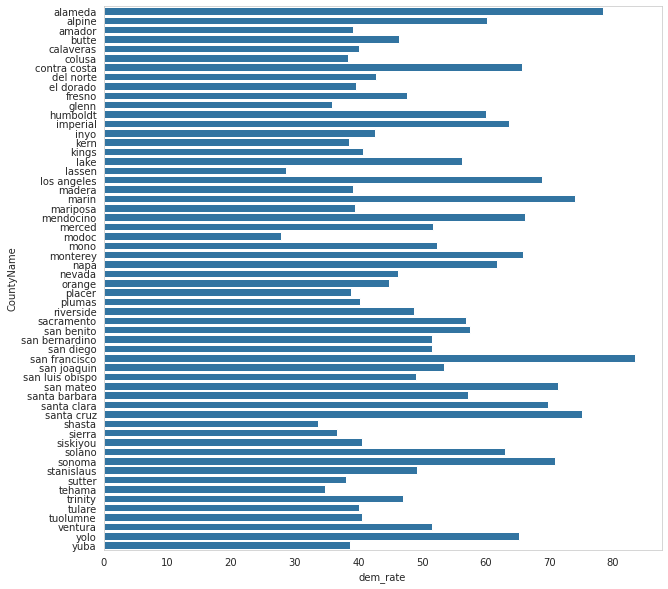

In [84]:
plt.figure(figsize=(10, 10))
sns.barplot(y='CountyName', x='dem_rate', data=CA_politics_dem, palette=['tab:blue']);

This barplot shows the distribution of democratic voters across all California counties. The distribution appears to be fairly normal.



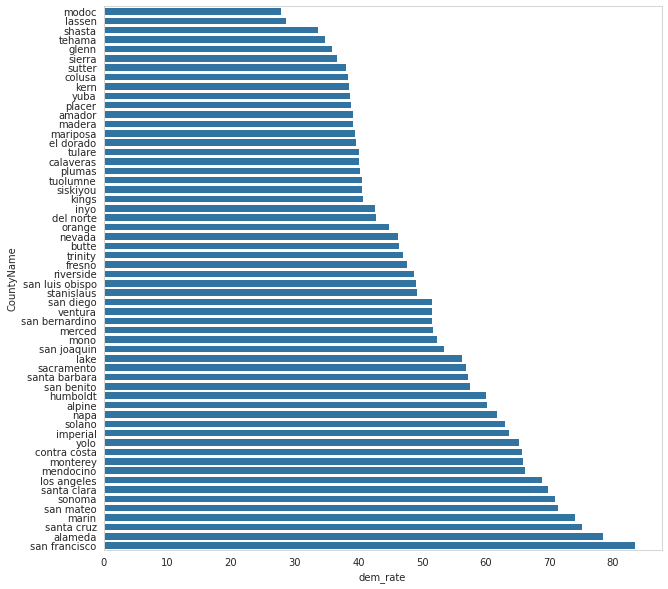

In [85]:
plt.figure(figsize=(10, 10))
sns.barplot(y='CountyName', x='dem_rate', data=CA_politics_dem, order=CA_politics_dem.sort_values('dem_rate').CountyName, palette=['tab:blue']);

The above graph shows a sorted barplot for the percentage of democratic voters in a county, we can see that yet again, counties in the bay and LA area seem to be more democratic, showing us college rate and democratic rates are linked based on our old data.



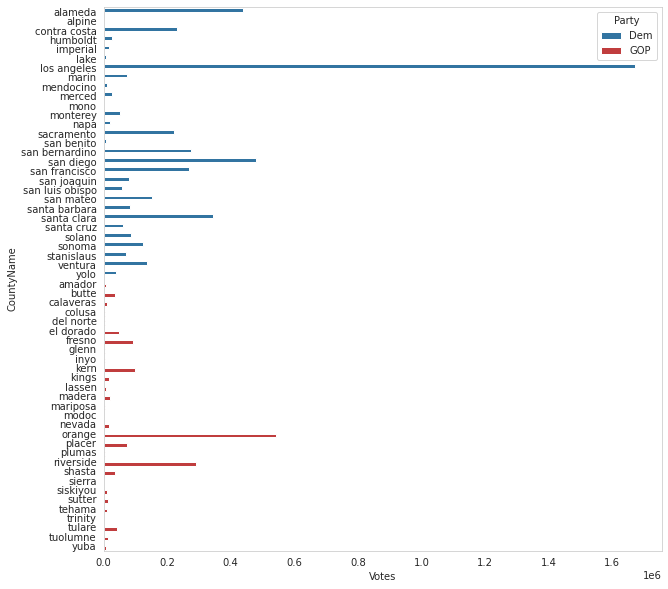

In [86]:
plt.figure(figsize=(10, 10))
sns.barplot(y=new_df['CountyName'], x=new_df['Votes'], hue=new_df['Party'], palette=['tab:blue', 'tab:red']);

This graph displays the number of votes the winning party received in each county. The bottom axis is in scientific notation as shown by the value in the bottom right. 

1429.027419845384


<function matplotlib.pyplot.show>

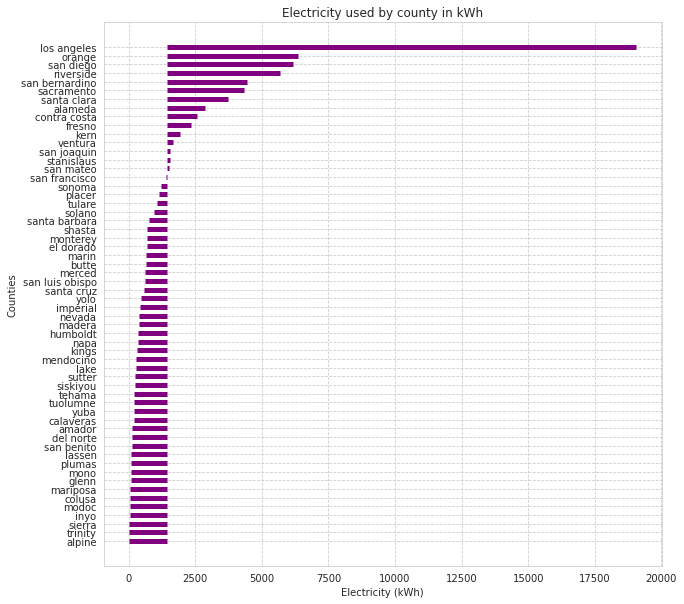

In [87]:
average_electric_by_county_copy = average_electric_by_county.copy()

#finding average electricity between all counties
average_electricity = average_electric_by_county_copy['electricity'].mean()
print(average_electricity)

average_electric_by_county_copy.sort_values('electricity', inplace=True)

plt.figure(figsize=(10, 10))
#making a diverging bar chart
plt.hlines(y=average_electric_by_county_copy['county'], xmin=average_electricity, xmax=average_electric_by_county_copy['electricity'], linewidth=5, color='purple')
#styling and formatting of plot
plt.gca().set(ylabel='Counties', xlabel='Electricity (kWh)')
plt.grid(linestyle='--')
plt.title('Electricity used by county in kWh')
plt.show


In the plot above, we can see electricitiy used in counties in kWh in a diverging bar chart, with the average calculated as ~1429 kWh. We can see from the chart that large population counties such as LA, Orange, San Diego are higher up well above the average, where smaller counties are narrowly less than the average. This shows us a huge energy disparity in what counties use the most energy.





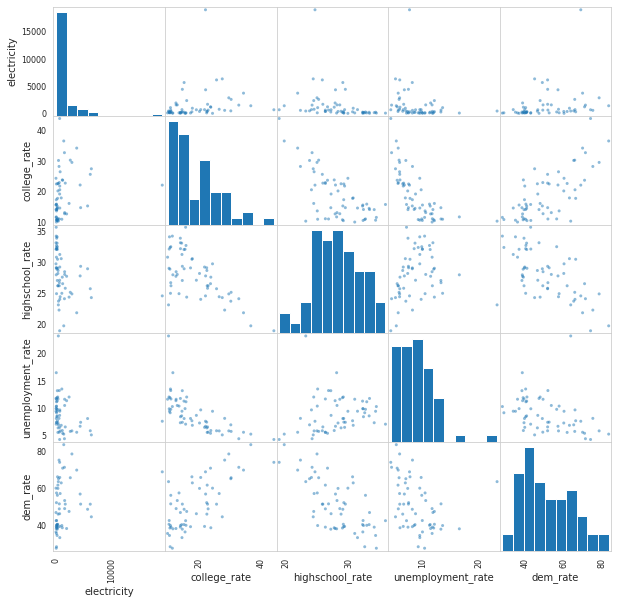

In [88]:
sns.set_style("whitegrid", {'axes.grid' : False})
pd.plotting.scatter_matrix(merged, figsize=(10, 10));

This scatter matrix displays the relationships between each of the collected variables from our datasets and placed into a merged dataframe. We can see from this scatterplot that some of the variables seem to have a weak correlation at the very least in the sense that they do not form directionless circles of data. There is a linear structure to many of the plots. From this, we know that we either will not find a strong connection, or we have to slightly adjust how we are looking and comparing the data to get a more clear picture. 

In [89]:
col = average_college['college_rate']
hig = average_electric_by_county['electricity']
t_val, p_val = stats.ttest_ind(col, hig)
t_val, p_val

(-3.8065672589157424, 0.00022845465139066518)

we look at a t-test for the college graduation rate and the amount of electricity used just to get an idea of the relationship between them. We found a relatively large t-value and a small p-value. 

In [90]:
outcome_1, predictors_1 = patsy.dmatrices('electricity ~ college_rate*highschool_rate*unemployment_rate*dem_rate', data = merged)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()
print(res_1.summary())
#Here, we look at the mapping of the electric usage of each county and 
#combine the other variables to get their combined effect. We then put 
#the data into an OLS and fit it, displaying the summary of the results

                            OLS Regression Results                            
Dep. Variable:            electricity   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     1.079
Date:                Tue, 15 Mar 2022   Prob (F-statistic):              0.403
Time:                        05:23:34   Log-Likelihood:                -533.14
No. Observations:                  58   AIC:                             1098.
Df Residuals:                      42   BIC:                             1131.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

In the above model fit we see that despite the adjusted R-squared value being quite low at 0.020 there is potentially strong multicollinearity between some of the factors we are observing. A few notable factors, with a p-value lower than 0.3, include being a democrat, highschool educated, highschool educated AND a democrat, college educated, and college educated AND democratic. This lower p value means that the results are less likely to be recreated using random data. This can suggest a stronger correlation between the factor/ combination of factors and higher/lower energy usage. While it may suggest this; we know that it is not enough evidence to conclude that the factors affect the energy usage either way.

# Ethics & Privacy

##Data Collection
Our group found public datasets that include collected statistics rather than surveys to reduce unethical bias. Our data does not include people's personal information so privacy would not be an issue in our data gathering.There may exist bias when collecting political affiliation data by county since gerrymandering plays a big role when it comes to political affiliation but we were mindful of this potential bias by gathering data collected by the government and not unofficial data collectors since political data collection can be collected in an unethical manner. We did the same with our education, unemployment and energy data and made sure that it was official government data.

##Data Analysis
One concern we have about our data analysis is that it can be used to target groups that we found to have high energy consumption especially because there is big movement for renewable energy and an even bigger disparity when it comes to being conscious of energy consumption. We made sure to emphasize that the data we found is not to blame those groups with higher energy consumption but to help spread awareness of energy consciousness to those who may need it most.  


# Conclusion & Discussion

After running our merged dataframe through OLS regression, our team found that while not all of our predictors resulted in a strong multicollinearity, some factors, such as highschool education, college education, political affiliations with the democratic party, and combinations of the three, do have results that suggest they may impact average energy usage. We came to this conclusion because while the overall adjusted R-squared value was low at 0.02, and the p-value of all factors (highschool education, college education, political affiliation, and unemployment rate) was very high at 0.882, meaning that we are likely to get similar results using random data, and so these factors together most likely do not have much correlation to higher energy usage.

So, while we were unable to conclude strong multicollinearity between all of the factors presented in our hypothesis we were able to observe some relationships between factors like highschool education, college education, and democratic party affiliation to higher energy usage. These factors individually and together had p values less than 0.5, with one as low as 0.15. There are definitely many factors unaccounted for such as large cities tending to have higher populations of educated individuals and democrats, as well as the fact that electricity and education are both things that have become more accessible in modern day society. So, our evidence is not strong enough to conclude that there is a correlation between these factors. 


# Team Contributions

- Brenda Fuentes
  - Report Write up : Overview, Ethics and Privacy.
Added to slideshow presentation and helped with presenting. 
Attended meetings for Research Planning, check-ins, and Finalizing.

- Britney Vi 
  - Helped with conceptual planning, some hand in background research, edited hypothesis and overview, wrote the conclusion, and wrote some content for the final slides.
Added documentation to most of the data cleaning portion, wrote explanations for visuals, performed data interpretation, and added some minor functions to observe relations between factors.
Attended meetings with the programming team to hash out plans and research functions to explore our data.

- Dhaval Jani
  - Helped with topic/question selection, looking for datasets, writing alot of EDA/Visualization/Analysis code with datasets, helped with video presentation, attended meetings, and helped push discussion on findings/meaning
  
- Persephonie Rodriguez
  - Did majority of report writing, including typed up research question, background section, hypothesis, some research, and overall formatting of the report. 
Attended regular meetings with group and ensured that everyone was working on something and contributed when possible.
Assisted with creating video.
Set up google powerpoint slide deck and added visuals and filled in some slides.


- Trent Barker
  - Helped form research question, find data, clean data, merge data, analyze data, commented code and notebook, submitted to github, attended group meetings, helped with slides and video presentation